In [5]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3,3] # achicar figuras

# N intervalos y puntos
Nint = 20
Nvec = Nint+1

# Dominio space-time
xs = np.linspace(0,1,Nvec)
h = 1/Nint
dt = 1e-3
tf = 1.0 # t0 = 0

# Operadores discretos
A = np.zeros((Nvec, Nvec))
I = np.eye(Nvec)
u = np.zeros(Nvec)
b = np.zeros(Nvec)

In [6]:
for k in range(1, Nvec-1):
    A[k, k-1] = -1 / h**2
    A[k,k] = 2 / h**2
    A[k, k+1] = -1 / h**2
    b[k] = f(xs[k])

# Condiciones de borde
A[0,0] = 1
b[0] = 0
A[Nvec-1, Nvec-1] = 1
b[Nvec-1] = 0

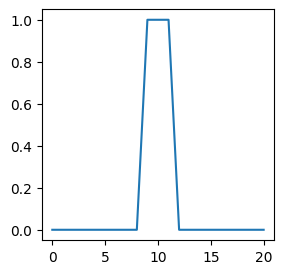

In [7]:
# Condición inicial
u0 = (xs > 0.4) & (xs < 0.6)
u[:] = u0

_ = plt.plot(u0)

def f(x): 
    return 1 # np.sin(x)

def sol(x):
    return 0.5 * x * (1-x)

Solving  t=0.0010
Solving  t=0.0020
Solving  t=0.0030
Solving  t=0.0040
Solving  t=0.0050
Solving  t=0.0060
Solving  t=0.0070
Solving  t=0.0080
Solving  t=0.0090
Solving  t=0.0100
Solving  t=0.0110
Solving  t=0.0120
Solving  t=0.0130
Solving  t=0.0140
Solving  t=0.0150
Solving  t=0.0160
Solving  t=0.0170
Solving  t=0.0180
Solving  t=0.0190
Solving  t=0.0200
Solving  t=0.0210
Solving  t=0.0220
Solving  t=0.0230
Solving  t=0.0240
Solving  t=0.0250
Solving  t=0.0260
Solving  t=0.0270
Solving  t=0.0280
Solving  t=0.0290
Solving  t=0.0300
Solving  t=0.0310
Solving  t=0.0320
Solving  t=0.0330
Solving  t=0.0340
Solving  t=0.0350
Solving  t=0.0360
Solving  t=0.0370
Solving  t=0.0380
Solving  t=0.0390
Solving  t=0.0400
Solving  t=0.0410
Solving  t=0.0420
Solving  t=0.0430
Solving  t=0.0440
Solving  t=0.0450
Solving  t=0.0460
Solving  t=0.0470
Solving  t=0.0480
Solving  t=0.0490
Solving  t=0.0500
Solving  t=0.0510
Solving  t=0.0520
Solving  t=0.0530
Solving  t=0.0540
Solving  t=0.0550
Solving  t

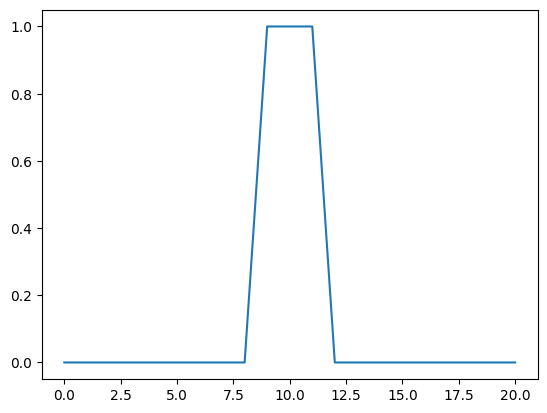

In [2]:
from numpy.linalg import solve
t = dt
us = [u.copy()] # u == u0 al empezar
while t < tf:
    print(f"Solving  t={t:2.4f}")
    Alhs = I + dt * A # Exp: I, Imp: I + dt A
    brhs = u  # Exp: u - dt A u, Imp: u
    u = solve(Alhs, brhs)
    us.append(u.copy())
    t += dt

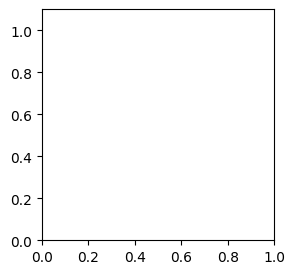

In [11]:
fig, ax = plt.subplots(figsize=(3,3))
line, = ax.plot([], [], 'b', lw=2)
ax.set_xlim(0,1)
ax.set_ylim(0,1.1)

def drawframe(n):
    line.set_data(xs, us[n])
    return line,

In [13]:
from IPython.display import HTML # pip install ffmpeg
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=50, blit=True)
HTML(anim.to_html5_video())